CON ESTE DATASET SE ESPERA DETERMINAR EL PERFIL DE LOS CLIENTES DE UN BANCO CON MAYOR POTENCIAL DE INVERSIÓN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv('dataset_banco.csv')

Visualizamos los datos

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
data.shape

(45215, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


En el peor de los casos, hacen falta 8 datos en 8 filas, lo que representa una mínima cantidad respecto a las 45215 filas existentes. Eliminamos estas filas.

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Buscamos filas repetidas, eliminamos si encontramos.

In [7]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1201,43,blue-collar,married,secondary,yes,-7.0,no,no,unknown,8,may,70.0,1,-1.0,0,unknown,no
36438,29,technician,single,tertiary,no,18254.0,no,no,cellular,11,may,279.0,2,-1.0,0,unknown,no
45197,59,management,married,tertiary,no,138.0,yes,yes,cellular,16,nov,162.0,2,187.0,5,failure,no
45203,52,technician,divorced,secondary,no,1005.0,yes,no,cellular,2,jun,195.0,1,-1.0,0,unknown,yes


In [8]:
data.drop_duplicates(inplace=True)
data.shape

(45203, 17)

Veamos si existen pocos valores diferentes en cada columna de tipo 'string', en dado caso se eliminan al no aportar información valiosa.

In [9]:
data_col_string=data.select_dtypes(include="object").columns.tolist()
for cols in data_col_string:
    print(f'Columna {cols}: {data[cols].nunique()} respuesta')

Columna job: 18 respuesta
Columna marital: 6 respuesta
Columna education: 10 respuesta
Columna default: 2 respuesta
Columna housing: 2 respuesta
Columna loan: 6 respuesta
Columna contact: 5 respuesta
Columna month: 12 respuesta
Columna poutcome: 6 respuesta
Columna y: 2 respuesta


Existen valores diferentes suficientes en cada columna para mantenerlas

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,41.005177,1373.893967,15.807115,258.039754,2.763843,40.177709,0.580138
std,12.037387,3923.852086,8.323018,257.470045,3.098168,100.104768,2.303344
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


El valor de 'std' proporciona información valiosa, los valores numéricos no se concentran en pocos datos, lo que da variabilidad en respuestas.

Busquemos respuestas incohengruentes para poder filtrarlas.

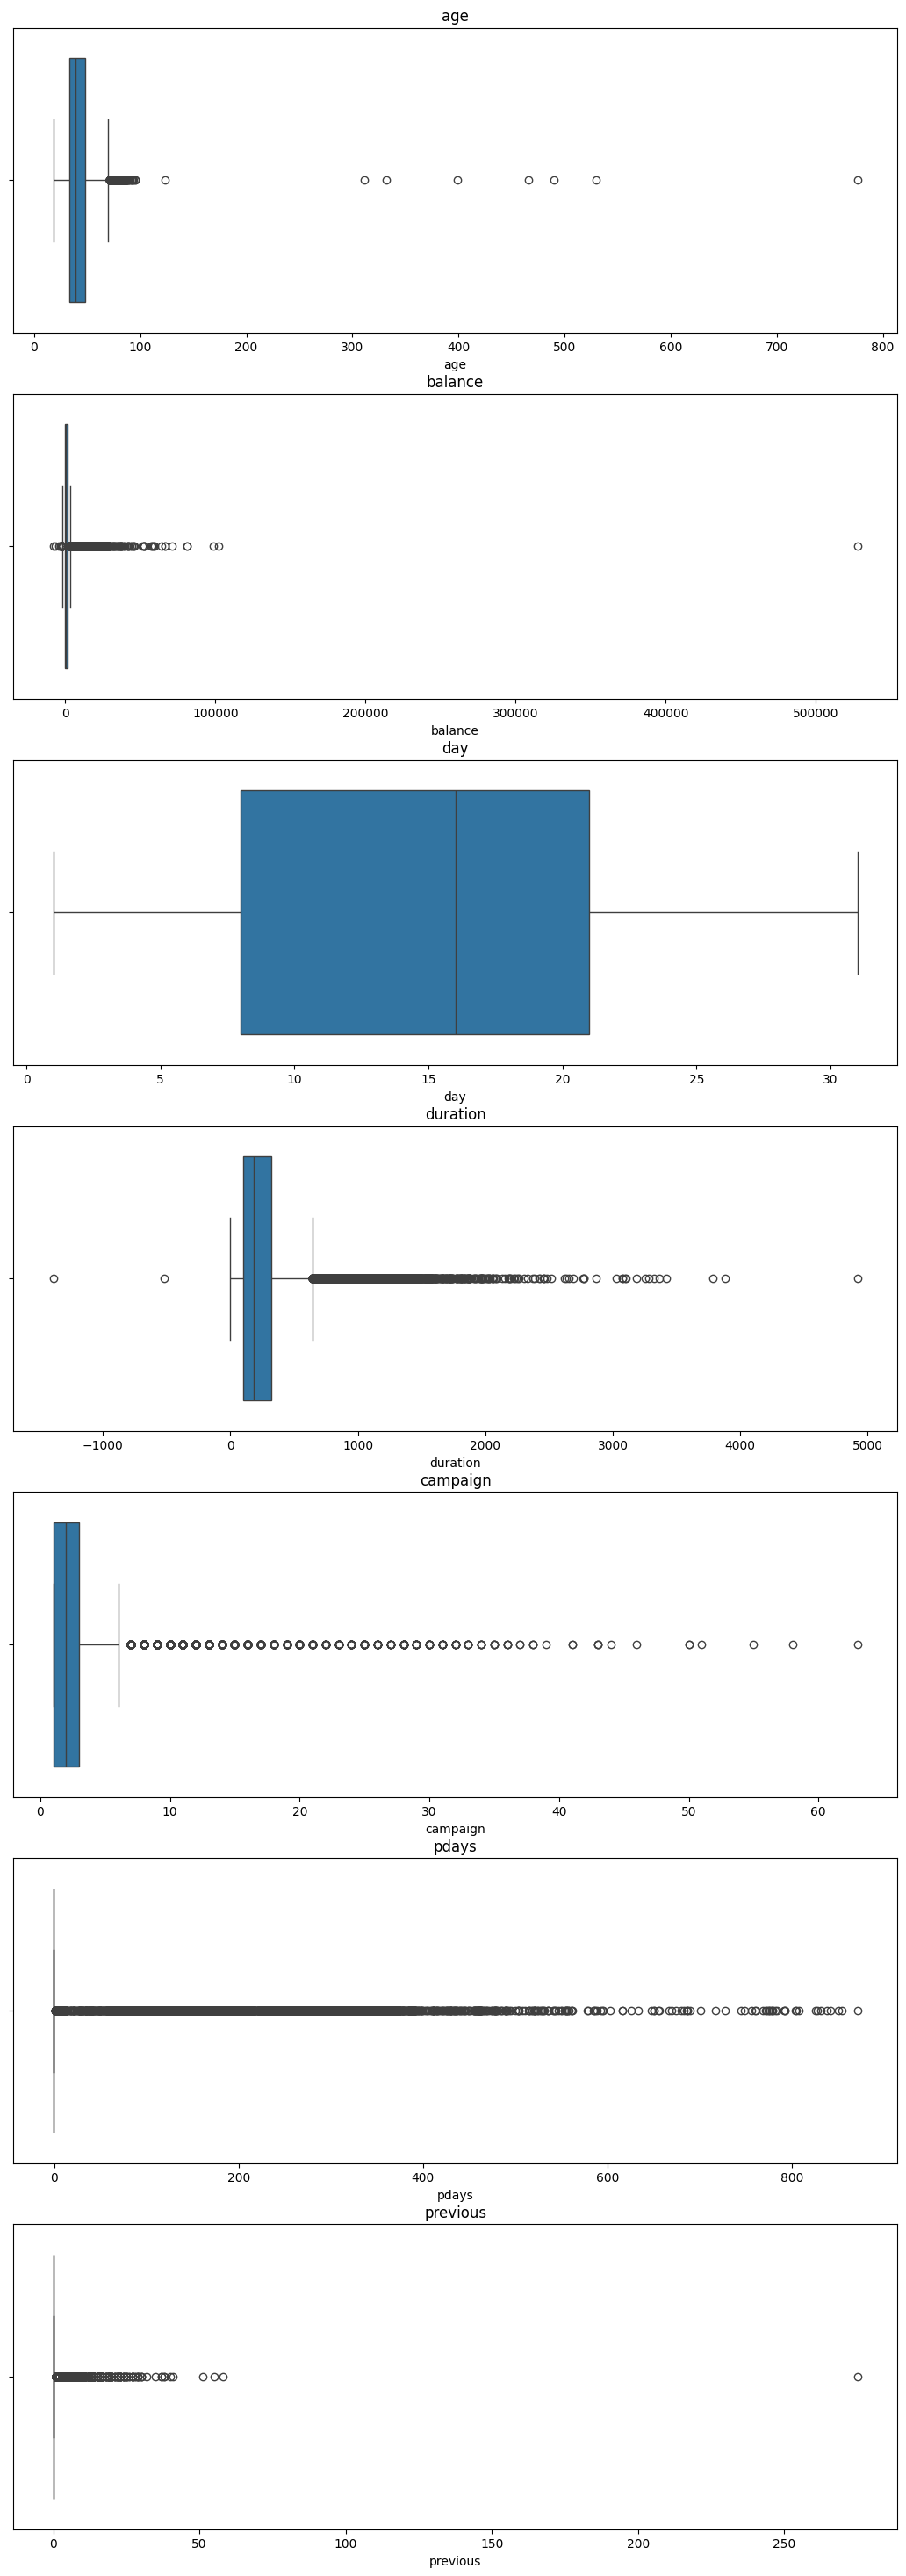

In [11]:
data_col_num=data.select_dtypes(include=["int64","float64"]).columns.tolist()
fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(13,37))
ax=ax.flatten()
for i,cols in enumerate(data_col_num):
    sbn.boxplot(x=cols,data=data,ax=ax[i])
    ax[i].set_title(cols)
plt.show()

1. Hacemos un filtro para que la edad del usuario sea menor a 100 años.

In [12]:
data=data[data["age"]<=100]
data.shape #Se eliminaron 8 registros

(45195, 17)

2. Hacemos un filtro para que la duración tenga unicamente valores positivos.

In [13]:
data=data[data["duration"]>0]
data.shape #Se eliminaron 5 registros

(45190, 17)

3. Hacemos un filtro para que el previo sea menor a 100 años.

In [ ]:
data=data[data["previous"]<=100]
data.shape #Se eliminó 1 registro

(45189, 17)

Busquemos errores tipograficos o la misma respuesta escrita diferente para hacer la correción.

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\3044583401.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\3044583401.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\3044583401.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\3044583401.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i]

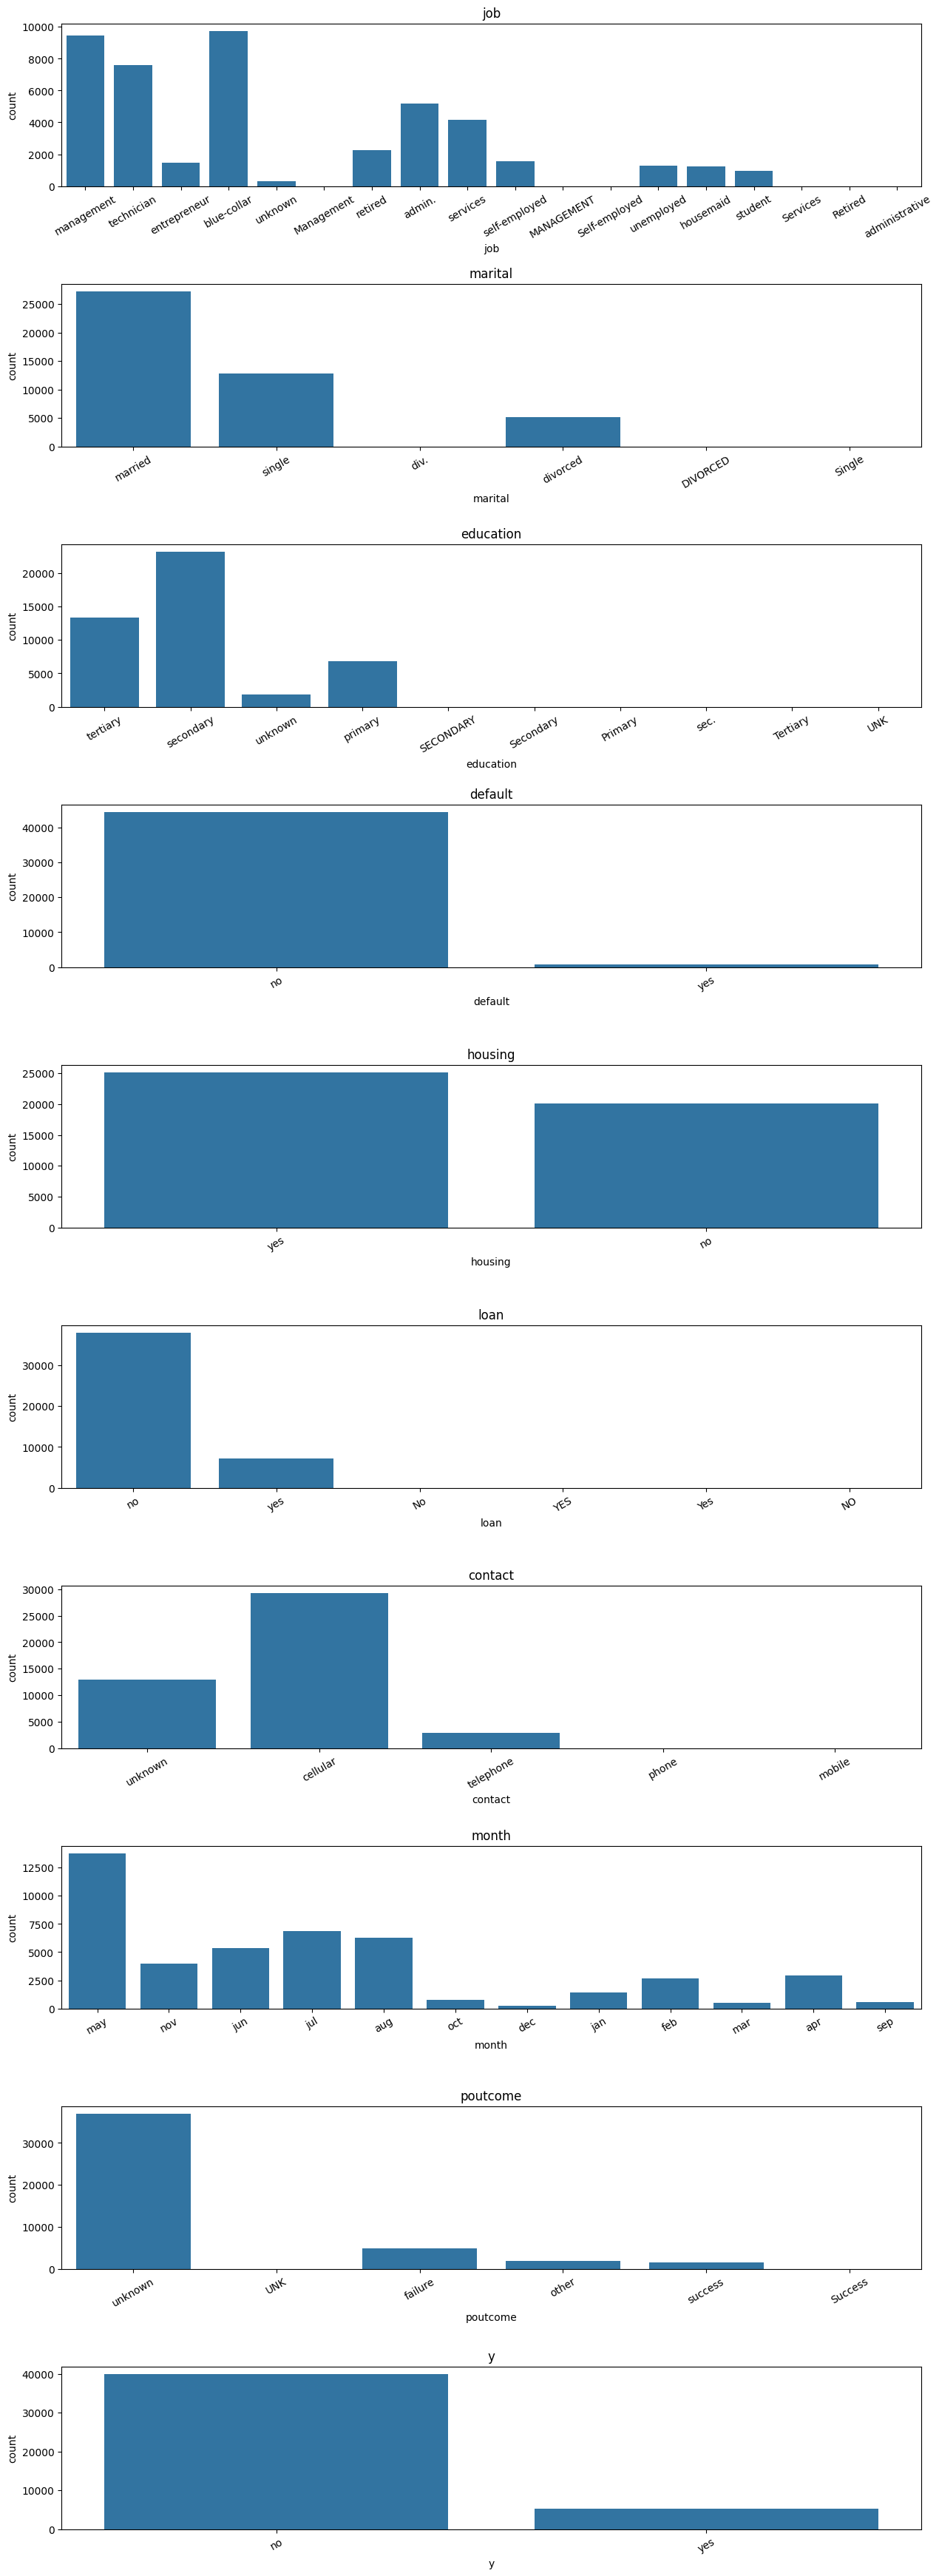

In [17]:
fig1,ax1 = plt.subplots(nrows=10, ncols=1,figsize=(15,44))
ax1 = ax1.flatten()
fig1.subplots_adjust(hspace=0.6)
for i,cols in enumerate(data_col_string): 
    sbn.countplot(x=cols,data=data,ax=ax1[i])
    ax1[i].set_title(cols)
    ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
plt.show()

1. Para corregir respuestas repetidas, convertimos a minúsculas todas las respuestas.

In [18]:
for col in data_col_string:
    data[col] = data[col].str.lower() 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i]

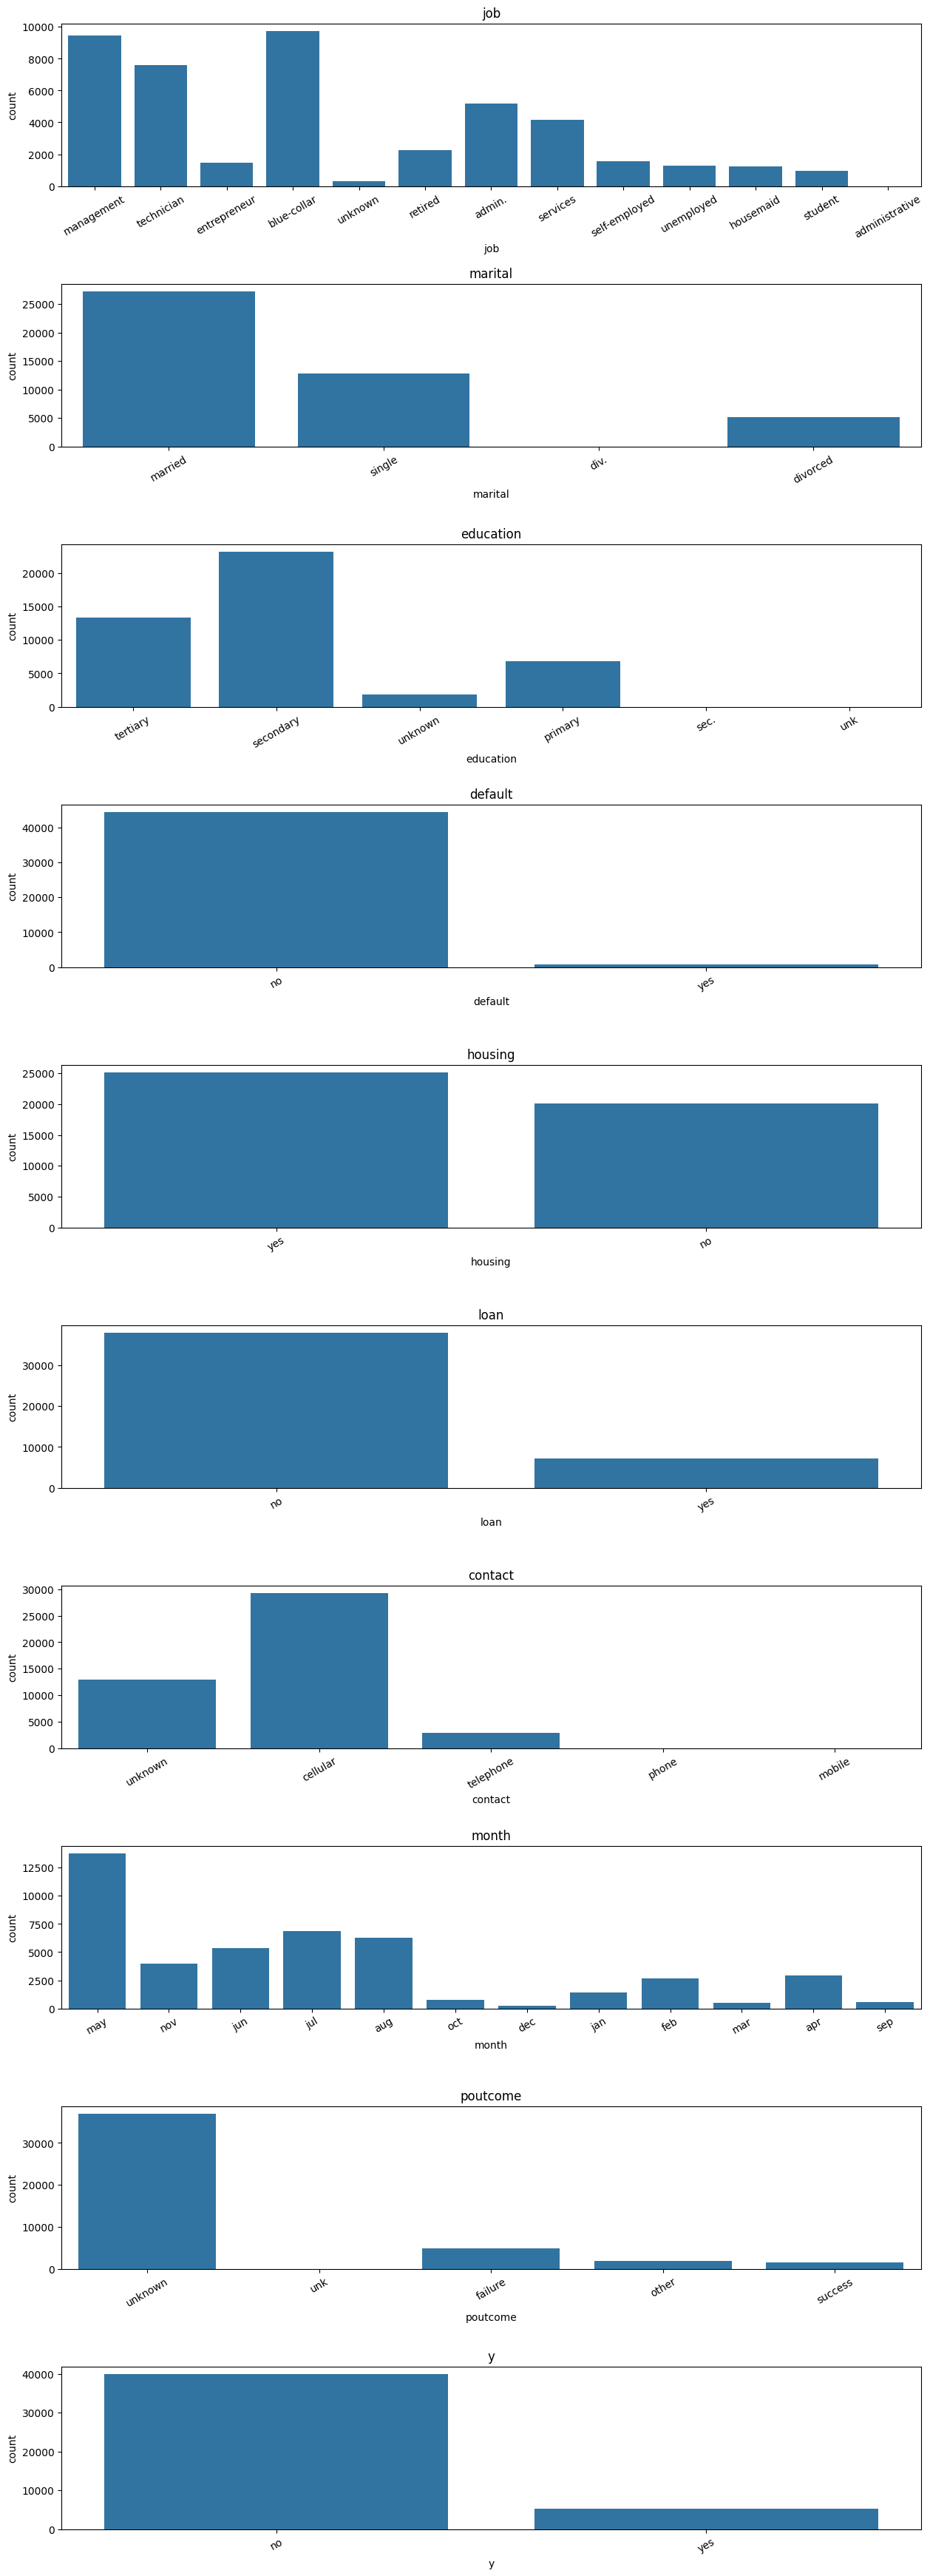

In [19]:
fig1,ax1 = plt.subplots(nrows=10, ncols=1,figsize=(15,44))
ax1 = ax1.flatten()
fig1.subplots_adjust(hspace=0.6)
for i,cols in enumerate(data_col_string): 
    sbn.countplot(x=cols,data=data,ax=ax1[i])
    ax1[i].set_title(cols)
    ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
plt.show() 

### OBSERVAMOS DE NUEVA CUENTA ###

2. Para la columna "job" tenemos que arreglar las respuestas:
    a) "admin." y "administrative"  

In [20]:
data["job"]=data["job"].replace('admin.','administrative')

3. Para la columna "marital" tenemos que arreglar las respuestas:
    a) "div." y "divorced"

In [21]:
data["marital"]=data["marital"].replace("div.","divorced")

4. Para la columna "education" tenemos que arreglar las respuestas:
    a) "sec." y "secondary"
    b) "unk" y "unknown"

In [22]:
data["education"]=data["education"].replace("sec.","secondary")
data["education"]=data["education"].replace("unk","unknown")

5. Para la columna "contact" tenemos que arreglar las respuestas:
    a) "phone" y "telephone"

In [23]:
data["contact"]=data["contact"].replace("phone","telephone")

6. Para la columna "poutcome" tenemos que arreglar las respuestas:
    a) "unk" y "unknown"

In [24]:
data["poutcome"]=data["poutcome"].replace("unk","unknown")

OBSERVAMOS UNA VEZ MÁS

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9548\2863586045.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1[i].set_xticklabels(ax1[i]

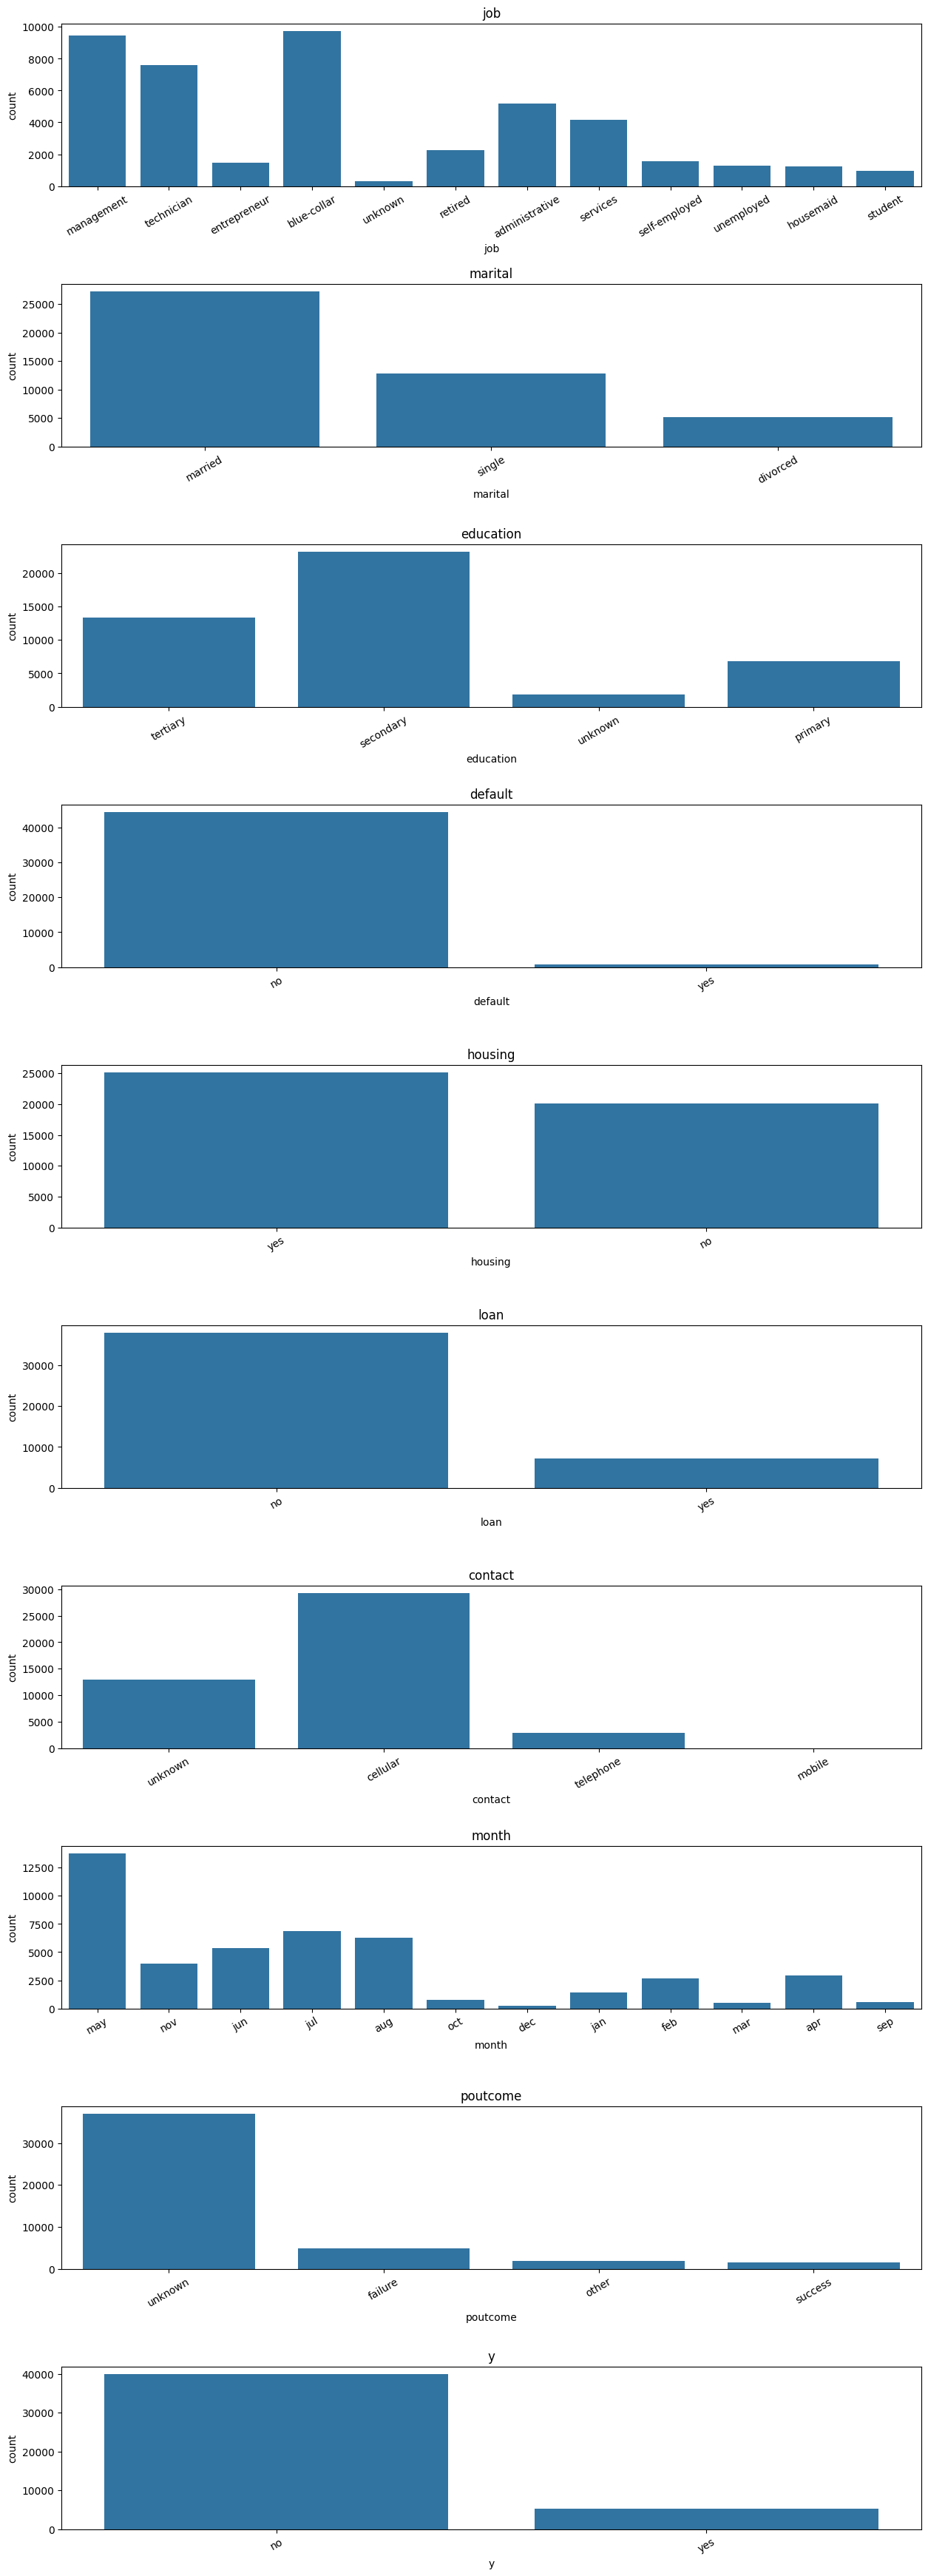

In [25]:
fig1,ax1 = plt.subplots(nrows=10, ncols=1,figsize=(15,44))
ax1 = ax1.flatten()
fig1.subplots_adjust(hspace=0.6)
for i,cols in enumerate(data_col_string): 
    sbn.countplot(x=cols,data=data,ax=ax1[i])
    ax1[i].set_title(cols)
    ax1[i].set_xticklabels(ax1[i].get_xticklabels(),rotation=30)
plt.show() 

### OBSERVAMOS DE NUEVA CUENTA ###